importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,matthews_corrcoef,recall_score,f1_score
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

data collection

In [ ]:
parkinsons_data = pd.read_csv('/content/parkinsons.csv')


In [ ]:
#grouping the data based on Parkinson's disease
parkinsons_data.groupby('status').mean()

<ipython-input-23-0e66bd47c25d>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  parkinsons_data.groupby('status').mean()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


Data Pre-Processing

Separating the features & Target

In [ ]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']


Splitting the data into training and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

data standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

Using KNN

Model performance for Training set
- Accuracy: 0.9743589743589743
- MCC: 0.9343535696978719
- F1 score: 0.9745601870734425
-----------------------
Model performance for Test set
- Accuracy: 0.8205128205128205
- MCC: 0.5282647804436963
- F1 score: 0.8301196276218579


<Axes: >

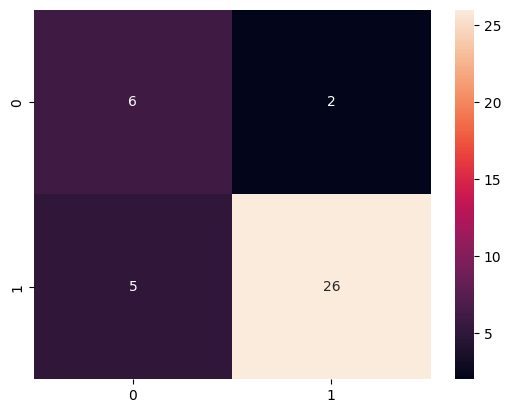

In [ ]:

knn = KNeighborsClassifier(3) # Define classifier
knn.fit(X_train,Y_train)# frain model
# Make predictions
Y_train_pred = knn.predict(X_train)
Y_test_pred=knn.predict (X_test)
# GPaining332₴3performance
knn_train_accuracy = accuracy_score(Y_train, Y_train_pred) # Calculate Accuracy
knn_train_mcc = matthews_corrcoef (Y_train, Y_train_pred) # Calculate MCC
knn_train_f1 = f1_score(Y_train, Y_train_pred, average='weighted') # Calculate F1-score
# Test set performance
knn_test_accuracy = accuracy_score(Y_test, Y_test_pred) # Calculate Accuracy
knn_test_mcc = matthews_corrcoef (Y_test, Y_test_pred) # Calculate MCC
knn_test_f1 = f1_score(Y_test, Y_test_pred, average='weighted' ) # Calculate Fl-score

print ('Model performance for Training set')
print('- Accuracy: %s' % knn_train_accuracy)
print('- MCC: %s' % knn_train_mcc)
print('- F1 score: %s' % knn_train_f1)
print('-----------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 score: %s' % knn_test_f1)

cf_matrix1=confusion_matrix(Y_test,Y_test_pred)
tn,fp,fn,tp=cf_matrix.ravel()
import seaborn as sns
sns.heatmap(cf_matrix,annot=True)

Using SVM

In [ ]:

svm_rbf = SVC (gamma=2, C=1)
svm_rbf.fit (X_train, Y_train)
# Make predictions
Y_train_pred = svm_rbf.predict (X_train)
Y_test_pred = svm_rbf.predict (X_test)
# Training set performance
svm_rbf_train_accuracy = accuracy_score(Y_train, Y_train_pred) # Calculate Accuracy
svm_rbf_train_mcc = matthews_corrcoef(Y_train,Y_train_pred) # Calculate MCC
svm_rbf_train_f1 = f1_score(Y_train, Y_train_pred, average='weighted') # Calculate F1-score
# Test set performance
svm_rbf_test_accuracy = accuracy_score(Y_test, Y_test_pred) # Calculate Accuracy
svm_rbf_test_mcc = matthews_corrcoef(Y_test, Y_test_pred) # Calculate MCC
svm_rbf_test_f1 = f1_score(Y_test, Y_test_pred, average='weighted') # Calculate Fl-score
print ('Model performance for Training set')
print ('- Accuracy: %s' % svm_rbf_train_accuracy)
print('- MCC: %s' % svm_rbf_train_mcc)
print('- F1 score: %s' % svm_rbf_train_f1)
print('-----------------------------------')
print ('Model performance for Test set')
print('- Accuracy: %s' % svm_rbf_test_accuracy)
print ('- MCC: %s' % svm_rbf_test_mcc)
print('- F1 score: %s' % svm_rbf_test_f1)

Model performance for Training set
- Accuracy: 1.0
- MCC: 1.0
- F1 score: 1.0
-----------------------------------
Model performance for Test set
- Accuracy: 0.8717948717948718
- MCC: 0.568257570707744
- F1 score: 0.8474411160978326


Combining the ML algorithms and creating a model

In [ ]:
# Define estimators

estimators = [
('knn', knn),
('svm_rbf', svm_rbf)
]
# Build stack model
model= StackingClassifier(
estimators=estimators, final_estimator=LogisticRegression()
)

In [ ]:
model.fit(X_train, Y_train)

StackingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                               ('svm_rbf', SVC(C=1, gamma=2))],
                   final_estimator=LogisticRegression())

In [ ]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.9743589743589743


In [ ]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
test_data_mcc = matthews_corrcoef(Y_test, Y_test_pred) # Calculate MCC
test_data_f1 = f1_score(Y_test, Y_test_pred, average='weighted')

In [ ]:
print('Accuracy score of test data : ', test_data_accuracy)
print('MCC  of test data : ', test_data_mcc)
print('F1 score of test data : ', test_data_f1)

Accuracy score of test data :  0.8205128205128205
MCC  of test data :  0.568257570707744
F1 score of test data :  0.8474411160978326


Confusion Matrix

<Axes: >

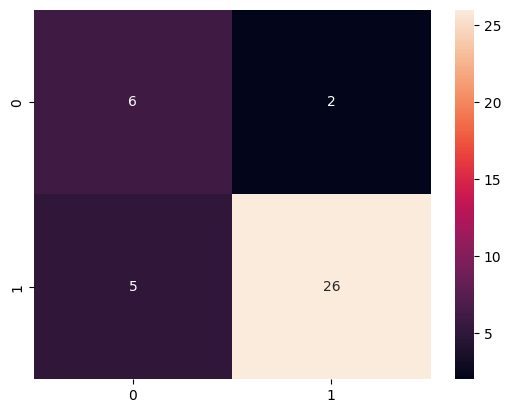

In [ ]:

cf_matrix=confusion_matrix(Y_test,X_test_prediction)
tn,fp,fn,tp=cf_matrix.ravel()
import seaborn as sns
sns.heatmap(cf_matrix,annot=True)

Building a predictive system


In [ ]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0]== 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[0]
The Person does not have Parkinsons Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
filename = 'parkinsons_model.sav'
pickle.dump(model,open(filename,'wb'))

In [ ]:
loaded_model=pickle.load(open('parkinsons_model.sav','rb'))